# Visual / Structural EDA — Page Images

**Dataset:** 30 Saudi REIT financial statement PDFs converted to individual page images (JPEG, 200 DPI).

**Source folder:** `pages_raw/`

**Objective:** Analyze image dimensions, orientations, pixel statistics, and visual consistency before any downstream processing.

## 1. Imports

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

IMAGE_DIR = "pages_raw"

files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(".jpg")])
print(f"Found {len(files)} images.")

Found 1179 images.


## 2. Dataset Overview

In [2]:
print(f"Total images: {len(files)}")
print(f"\nSample filenames (first 10):")
for f in files[:10]:
    print(f"  {f}")

Total images: 1179

Sample filenames (first 10):
  FS10_page_1.jpg
  FS10_page_10.jpg
  FS10_page_11.jpg
  FS10_page_12.jpg
  FS10_page_13.jpg
  FS10_page_14.jpg
  FS10_page_15.jpg
  FS10_page_16.jpg
  FS10_page_17.jpg
  FS10_page_18.jpg


In [3]:
# Collect metadata for every image
records = []
for fname in files:
    img = Image.open(os.path.join(IMAGE_DIR, fname))
    w, h = img.size
    gray = np.array(img.convert("L"))
    records.append({
        "file": fname,
        "width": w,
        "height": h,
        "resolution": f"{w}x{h}",
        "rotated": w > h,
        "mean_brightness": round(gray.mean(), 2),
        "min_brightness": int(gray.min()),
        "max_brightness": int(gray.max()),
    })

df = pd.DataFrame(records)
print(f"Metadata collected for {len(df)} images.")
df.head()

Metadata collected for 1179 images.


file  width  height resolution  rotated  mean_brightness  \
0   FS10_page_1.jpg   1654    2339  1654x2339    False           253.57   
1  FS10_page_10.jpg   1700    2200  1700x2200    False           243.44   
2  FS10_page_11.jpg   1701    2201  1701x2201    False           246.66   
3  FS10_page_12.jpg   1701    2201  1701x2201    False           244.39   
4  FS10_page_13.jpg   1701    2201  1701x2201    False           240.54   

   min_brightness  max_brightness  
0               0             255  
1               0             255  
2               0             255  
3               0             255  
4               0             255

## 3. Resolution Analysis

Frequency of each unique resolution across all page images.

In [4]:
res_freq = (
    df["resolution"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Resolution", "resolution": "Resolution", "count": "Count"})
)
res_freq.columns = ["Resolution", "Count"]
res_freq["Percentage"] = (res_freq["Count"] / len(df) * 100).round(1).astype(str) + "%"

print(f"Unique resolutions: {len(res_freq)}\n")
res_freq

Unique resolutions: 39



Resolution  Count Percentage
0   1700x2200    422      35.8%
1   1654x2338    273      23.2%
2   1654x2339    233      19.8%
3   1653x2339     54       4.6%
4   1653x2338     46       3.9%
5   1701x2201     39       3.3%
6   2200x1700     27       2.3%
7   2339x1654     12       1.0%
8   1655x2339     10       0.8%
9   1656x2336      8       0.7%
10  1656x2339      8       0.7%
11  1654x2340      6       0.5%
12  2338x1654      6       0.5%
13  1652x2324      5       0.4%
14  2201x1701      3       0.3%
15  1652x2332      2       0.2%
16  1652x2327      2       0.2%
17  2340x1654      2       0.2%
18  2339x1656      1       0.1%
19  2324x1652      1       0.1%
20  1652x2325      1       0.1%
21  1652x2335      1       0.1%
22  1649x2344      1       0.1%
23  1651x2335      1       0.1%
24  1649x2341      1       0.1%
25  1652x2339      1       0.1%
26  1653x2329      1       0.1%
27  1651x2325      1       0.1%
28  1651x2334      1       0.1%
29  1653x2324      1       0.1%
30  1652x2321      1       0.1%
31  1651x2331      1       0.1%
32  1652x2334      1       0.1%
33  2322x1651      1       0.1%
34  1651x2328      1       0.1%
35  1654x2322      1       0.1%
36  1652x2322      1       0.1%
37  1651x2321      1       0.1%
38  5334x3750      1       0.1%

## 4. Orientation Check

Pages where `width > height` are likely rotated or landscape-oriented.

In [5]:
rotated_df = df[df["rotated"]]
print(f"Rotated pages (width > height): {len(rotated_df)} / {len(df)}  ({round(len(rotated_df)/len(df)*100, 1)}%)\n")

if len(rotated_df) > 0:
    print("Rotated files:")
    for _, row in rotated_df.iterrows():
        print(f"  {row['file']}  ({row['width']}x{row['height']})")
else:
    print("No rotated pages detected.")

Rotated pages (width > height): 54 / 1179  (4.6%)

Rotated files:
  FS10_page_23.jpg  (2201x1701)
  FS11_page_17.jpg  (2339x1654)
  FS11_page_8.jpg  (2340x1654)
  FS13_page_23.jpg  (2200x1700)
  FS16_page_9.jpg  (2339x1654)
  FS17_page_20.jpg  (2201x1701)
  FS17_page_21.jpg  (2201x1701)
  FS17_page_8.jpg  (2200x1700)
  FS18_page_22.jpg  (2339x1654)
  FS18_page_23.jpg  (2339x1654)
  FS18_page_9.jpg  (2339x1654)
  FS19_page_22.jpg  (2200x1700)
  FS19_page_23.jpg  (2200x1700)
  FS19_page_25.jpg  (2200x1700)
  FS19_page_26.jpg  (2200x1700)
  FS19_page_27.jpg  (2200x1700)
  FS19_page_29.jpg  (2200x1700)
  FS19_page_30.jpg  (2200x1700)
  FS19_page_33.jpg  (2200x1700)
  FS19_page_43.jpg  (2200x1700)
  FS19_page_44.jpg  (2200x1700)
  FS19_page_51.jpg  (2200x1700)
  FS19_page_52.jpg  (2200x1700)
  FS19_page_7.jpg  (2340x1654)
  FS20_page_9.jpg  (2339x1654)
  FS21_page_26.jpg  (2339x1654)
  FS22_page_31.jpg  (2338x1654)
  FS22_page_39.jpg  (2338x1654)
  FS22_page_41.jpg  (2338x1654)
  FS22_page_

## 5. Pixel Intensity Statistics

Per-image mean brightness computed on grayscale conversion (0 = black, 255 = white).

In [6]:
brightness_stats = pd.DataFrame({
    "Metric": [
        "Global mean brightness",
        "Std of mean brightness",
        "Min per-image mean brightness",
        "Max per-image mean brightness",
        "Darkest pixel (across all images)",
        "Brightest pixel (across all images)",
    ],
    "Value": [
        round(df["mean_brightness"].mean(), 2),
        round(df["mean_brightness"].std(), 2),
        df["mean_brightness"].min(),
        df["mean_brightness"].max(),
        df["min_brightness"].min(),
        df["max_brightness"].max(),
    ]
})

brightness_stats

Metric   Value
0               Global mean brightness  246.71
1               Std of mean brightness    7.73
2        Min per-image mean brightness   85.09
3        Max per-image mean brightness  254.65
4    Darkest pixel (across all images)    0.00
5  Brightest pixel (across all images)  255.00

## 6. Width & Height Distribution

In [7]:
summary = df[["width", "height", "mean_brightness"]].describe().round(2)
summary

width   height  mean_brightness
count  1179.00  1179.00          1179.00
mean   1702.27  2255.75           246.71
std     163.43   147.88             7.73
min    1649.00  1651.00            85.09
25%    1654.00  2200.00           244.99
50%    1654.00  2338.00           247.25
75%    1700.00  2339.00           249.18
max    5334.00  3750.00           254.65

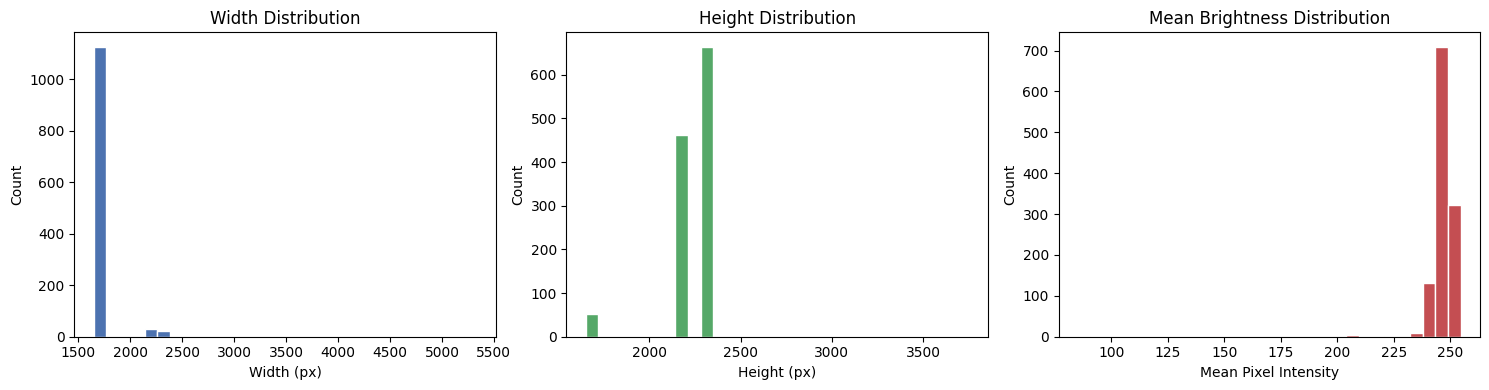

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df["width"], bins=30, color="#4C72B0", edgecolor="white")
axes[0].set_title("Width Distribution")
axes[0].set_xlabel("Width (px)")
axes[0].set_ylabel("Count")

axes[1].hist(df["height"], bins=30, color="#55A868", edgecolor="white")
axes[1].set_title("Height Distribution")
axes[1].set_xlabel("Height (px)")
axes[1].set_ylabel("Count")

axes[2].hist(df["mean_brightness"], bins=30, color="#C44E52", edgecolor="white")
axes[2].set_title("Mean Brightness Distribution")
axes[2].set_xlabel("Mean Pixel Intensity")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

## 7. Outlier Detection

Images with width, height, or brightness beyond 2 standard deviations from the mean.

In [9]:
def flag_outliers(series, n_std=2):
    mean, std = series.mean(), series.std()
    return (series - mean).abs() > n_std * std

df["outlier_width"] = flag_outliers(df["width"])
df["outlier_height"] = flag_outliers(df["height"])
df["outlier_brightness"] = flag_outliers(df["mean_brightness"])
df["is_outlier"] = df["outlier_width"] | df["outlier_height"] | df["outlier_brightness"]

outliers = df[df["is_outlier"]][["file", "width", "height", "mean_brightness",
                                  "outlier_width", "outlier_height", "outlier_brightness"]]
print(f"Total outliers: {len(outliers)}\n")
if len(outliers) > 0:
    display(outliers.reset_index(drop=True))
else:
    print("No outliers detected.")

Total outliers: 62



file  width  height  mean_brightness  outlier_width  \
0   FS10_page_23.jpg   2201    1701           245.90           True   
1   FS11_page_17.jpg   2339    1654           249.24           True   
2    FS11_page_8.jpg   2340    1654           247.28           True   
3   FS13_page_23.jpg   2200    1700           247.62           True   
4    FS16_page_9.jpg   2339    1654           247.93           True   
..               ...    ...     ...              ...            ...   
57  RSF5_page_25.jpg   2200    1700           247.63           True   
58  RSF5_page_26.jpg   2200    1700           248.65           True   
59  RSF5_page_35.jpg   1653    2339           207.52          False   
60  RSF6_page_32.jpg   5334    3750           245.16           True   
61  RSF8_page_40.jpg   2339    1654           253.87           True   

    outlier_height  outlier_brightness  
0             True               False  
1             True               False  
2             True               False  
3             True               False  
4             True               False  
..             ...                 ...  
57            True               False  
58            True               False  
59           False                True  
60            True               False  
61            True               False  

[62 rows x 7 columns]

## 8. Random Sample Display

Grid of 10 randomly selected page images for visual inspection.

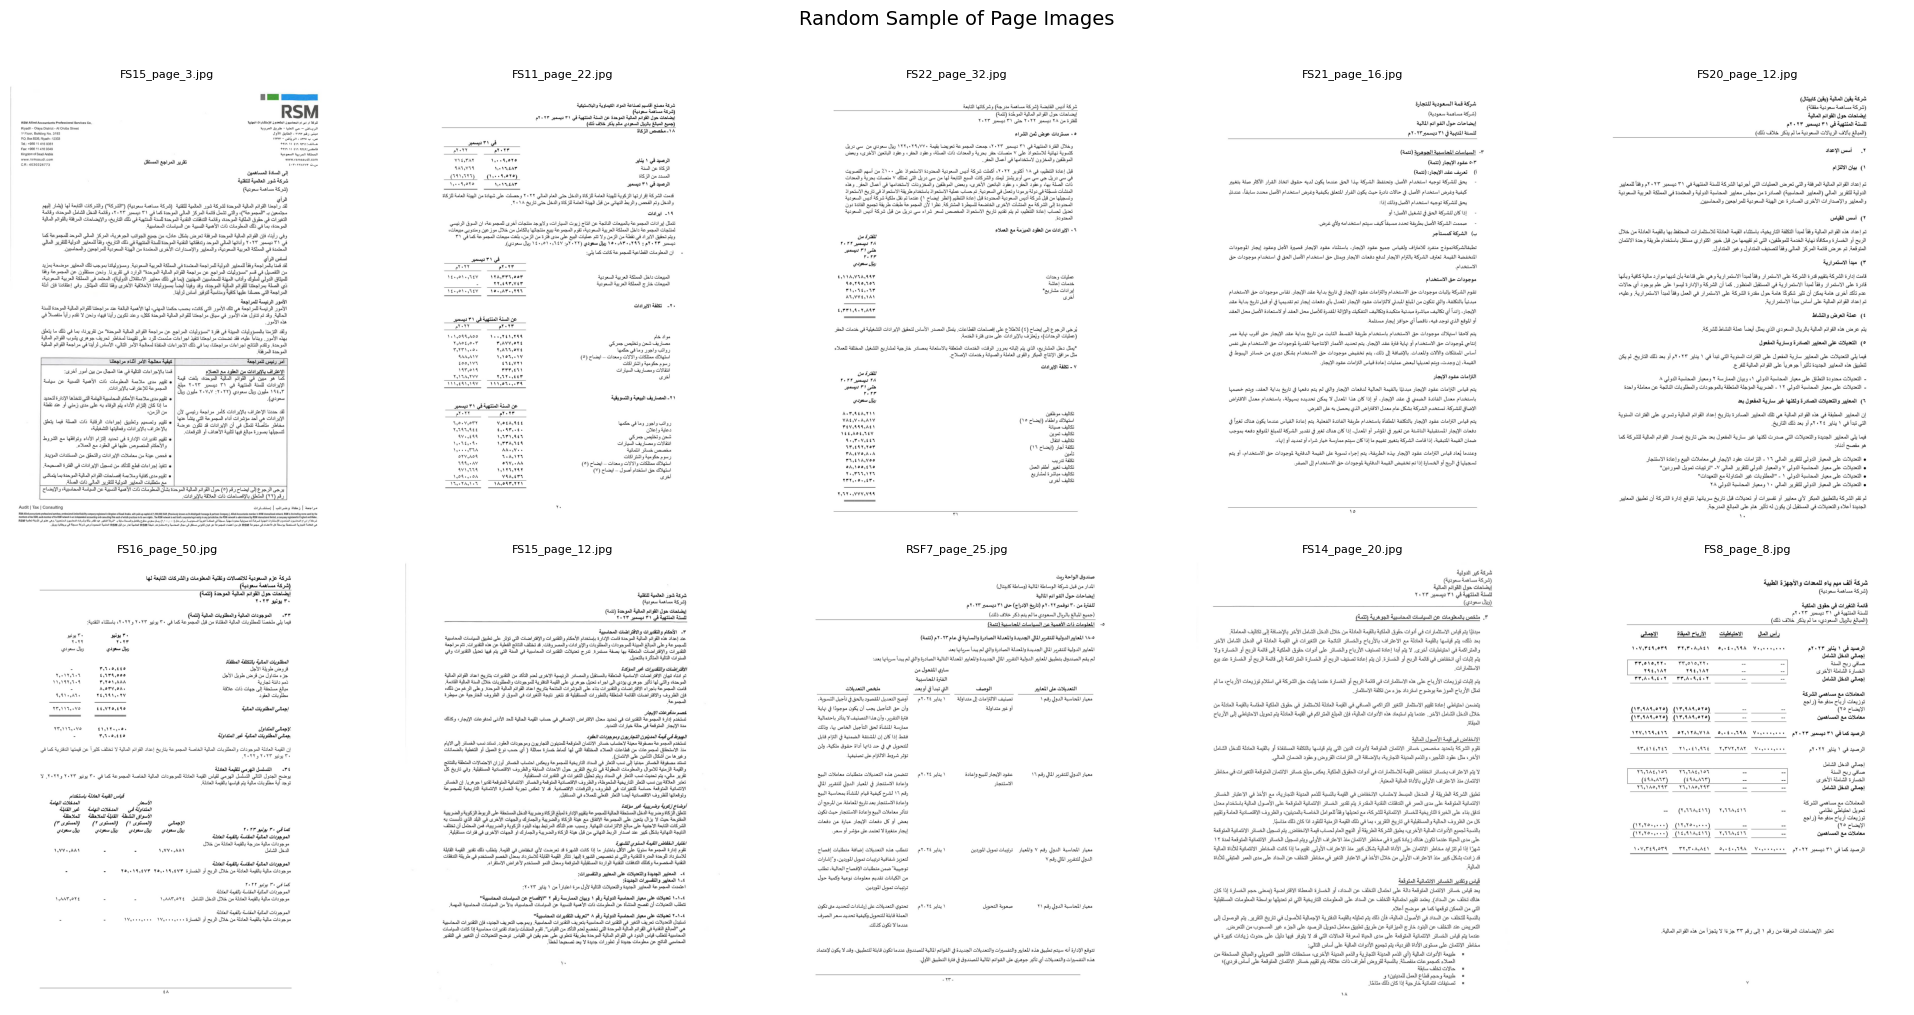

In [10]:
random.seed(42)
samples = random.sample(files, min(10, len(files)))

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for idx, fname in enumerate(samples):
    img = Image.open(os.path.join(IMAGE_DIR, fname))
    axes[idx].imshow(img)
    axes[idx].set_title(fname, fontsize=8)
    axes[idx].axis("off")

plt.suptitle("Random Sample of Page Images", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

## 9. Outlier Images Visualization

Visual display of all 62 flagged outlier images (size or brightness beyond 2 std).

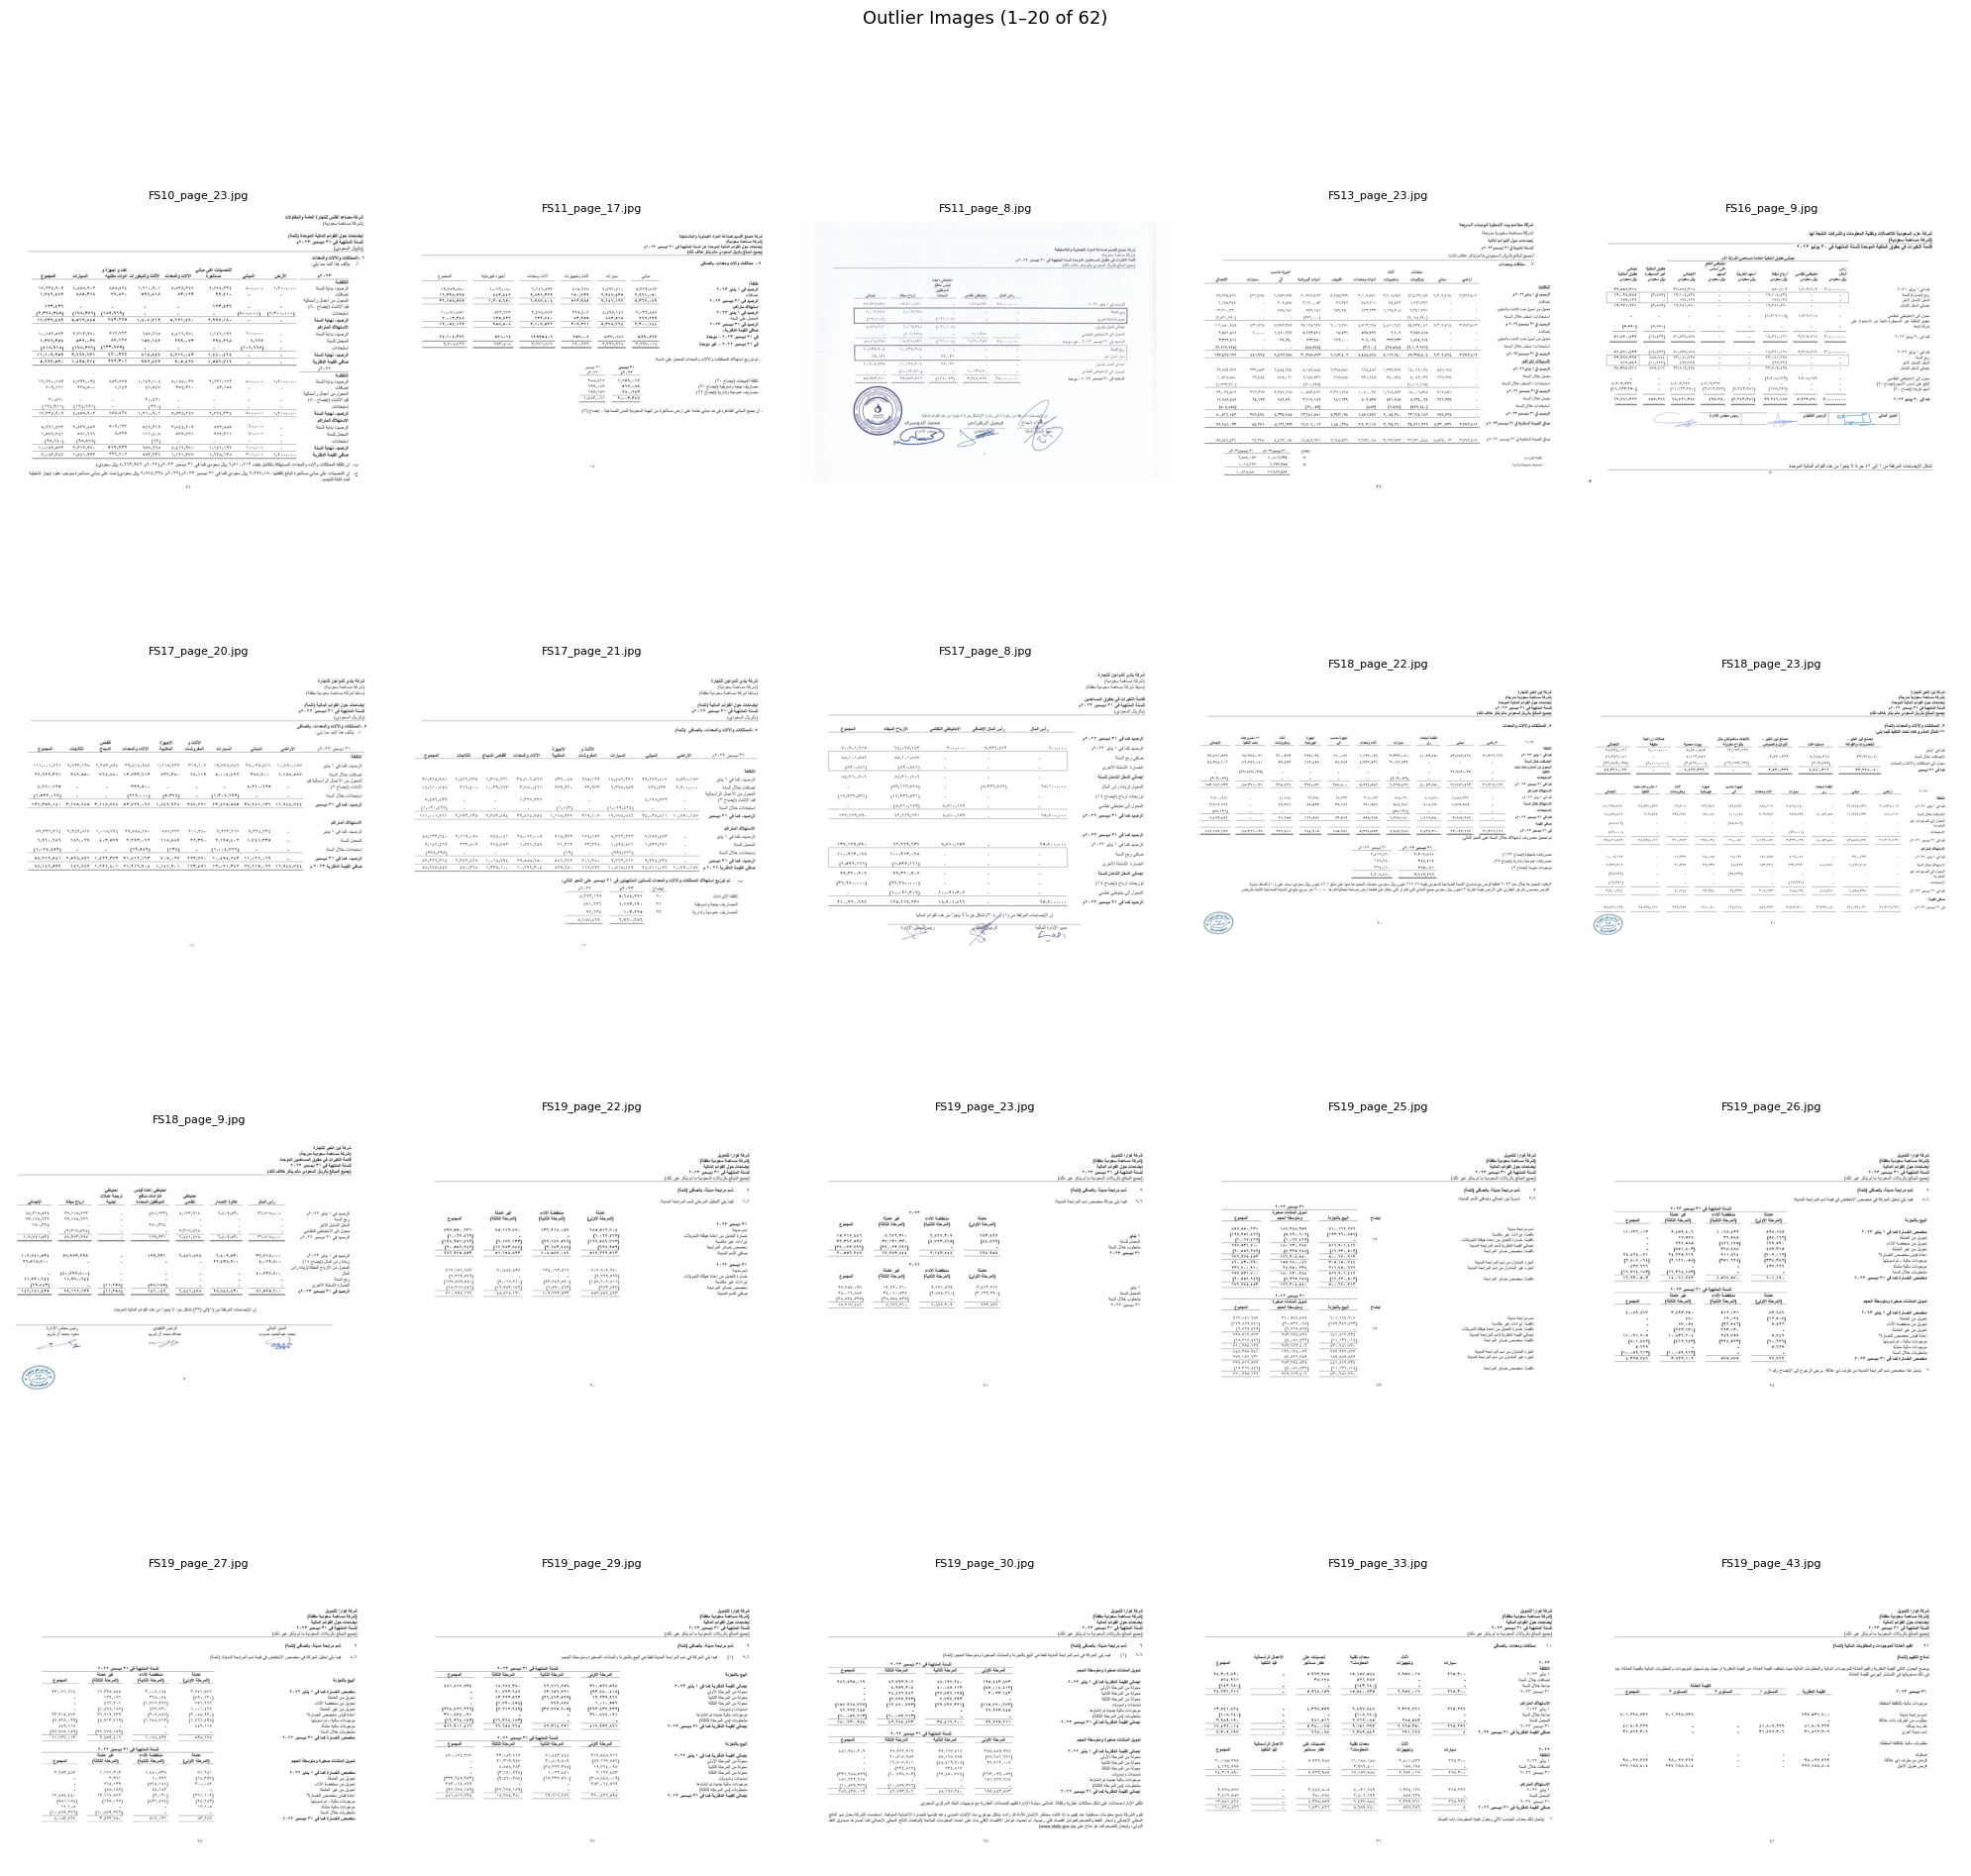

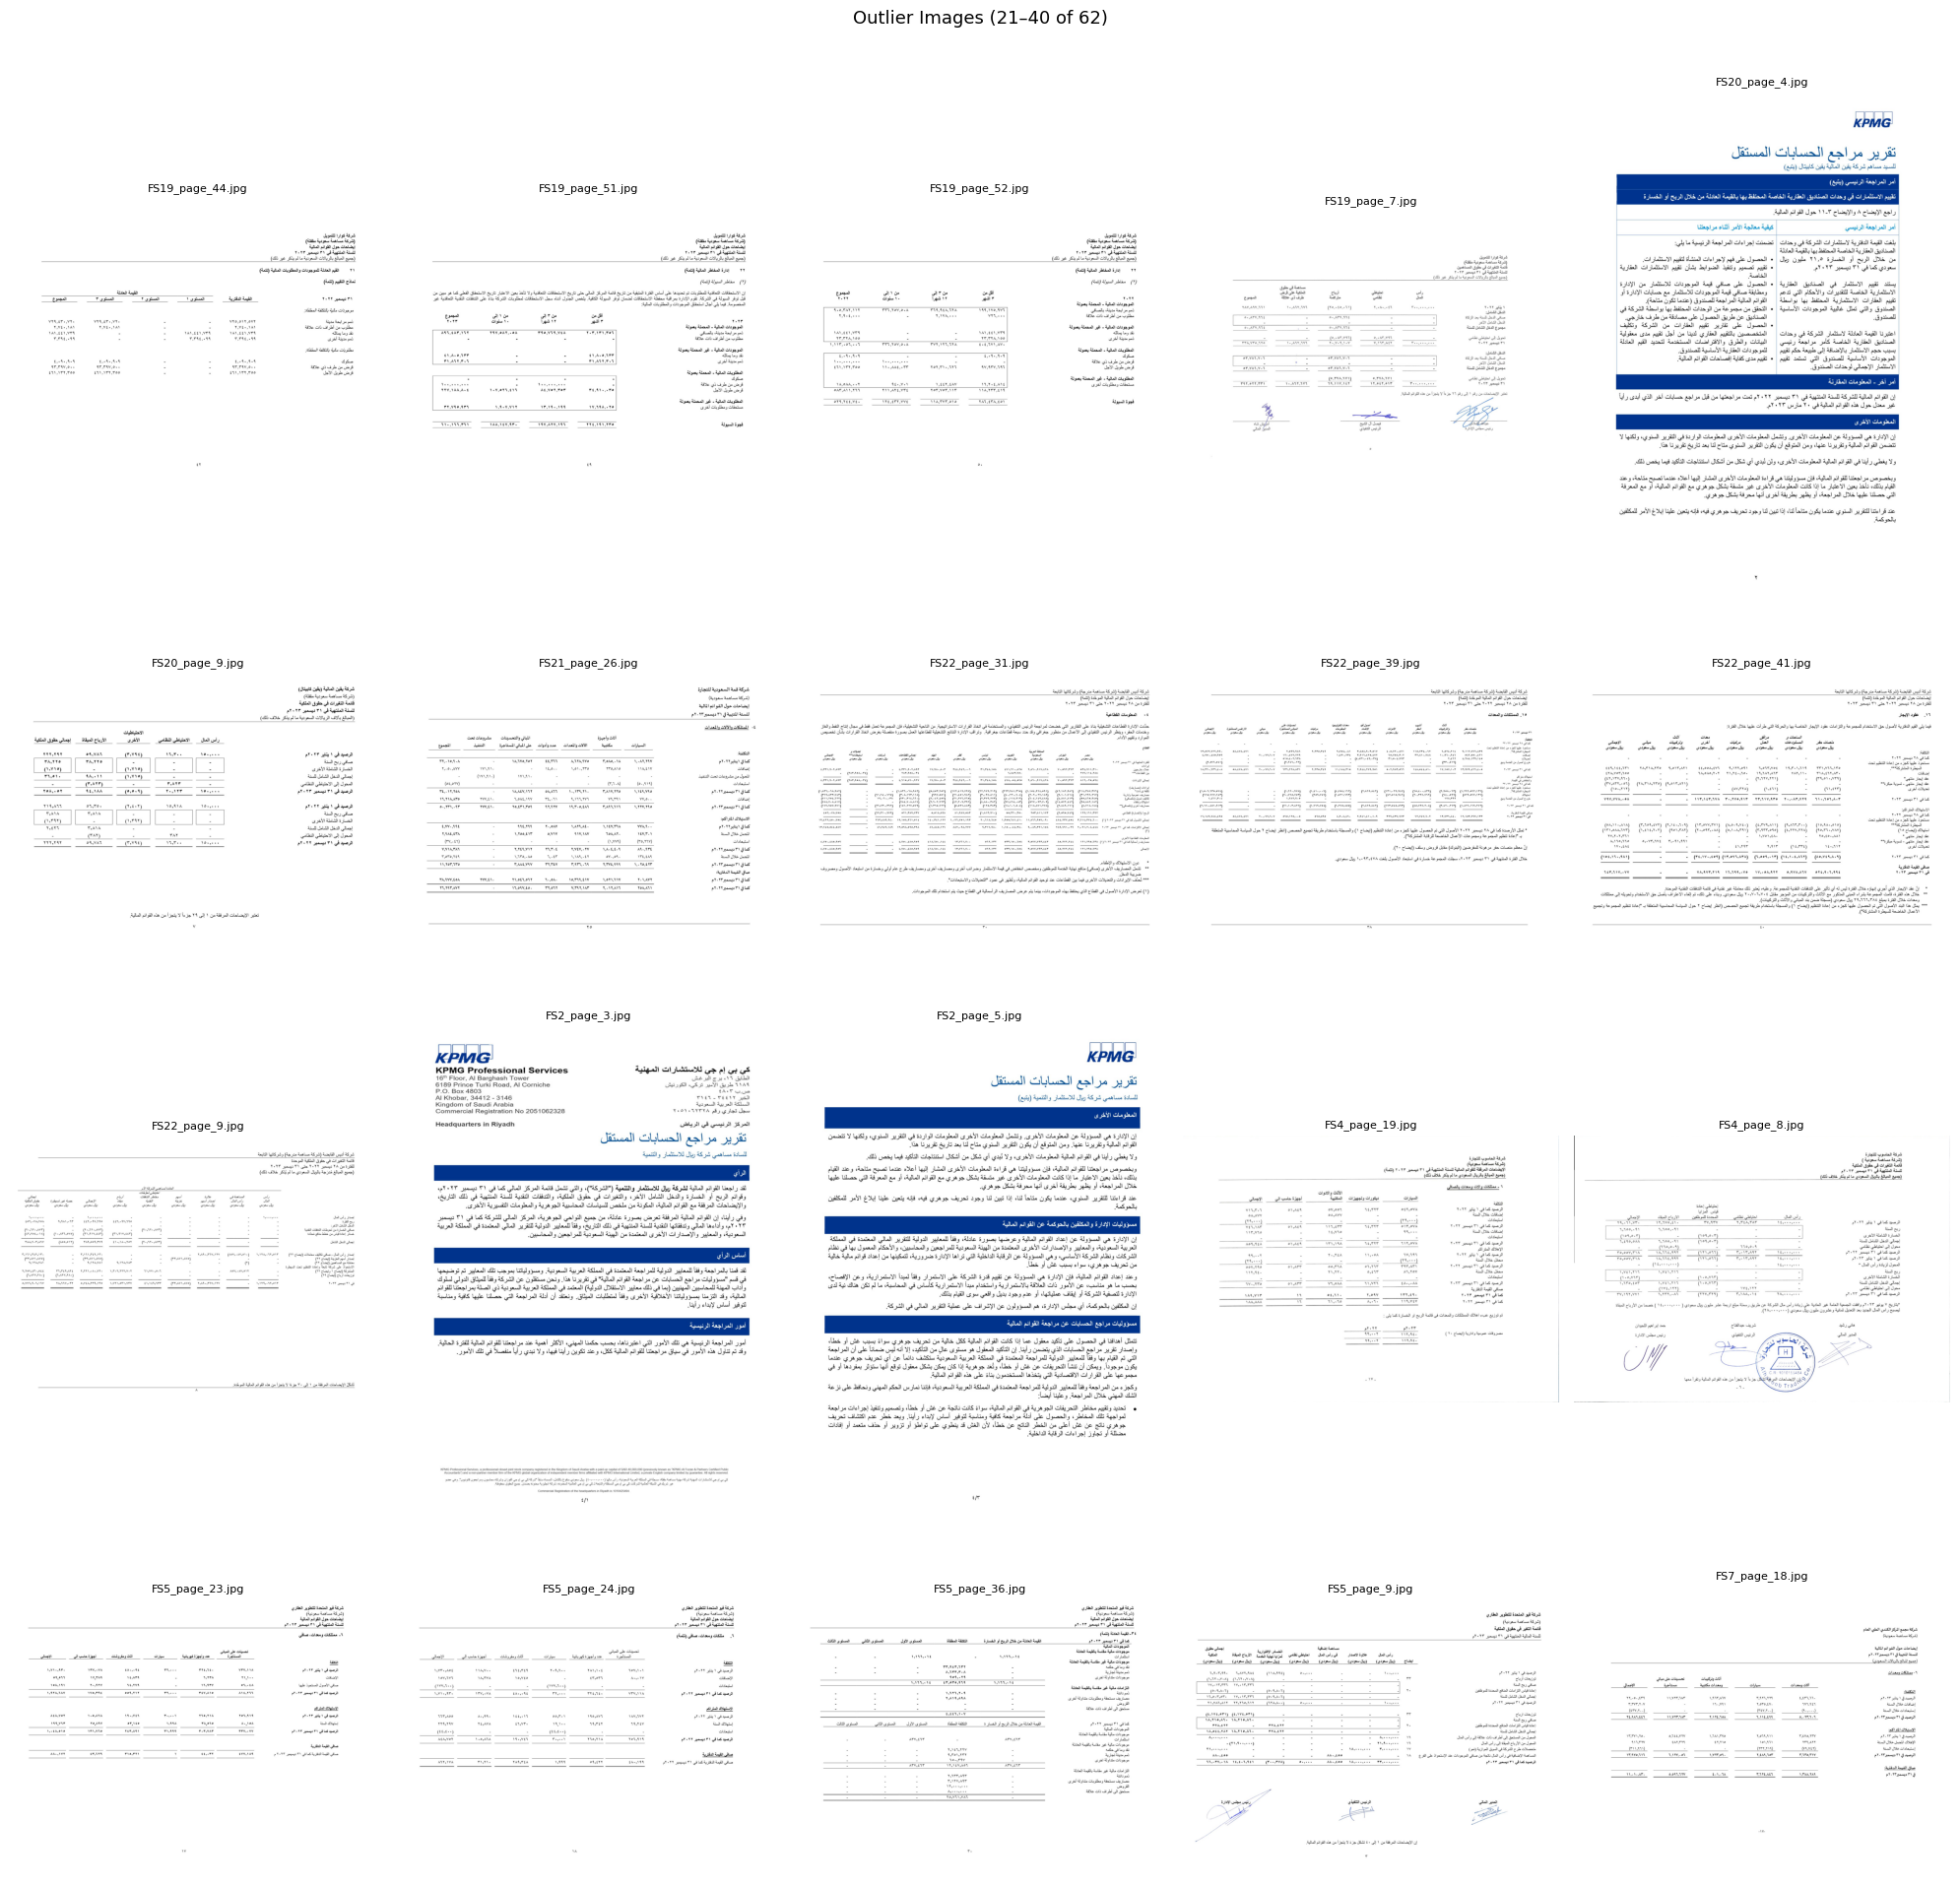

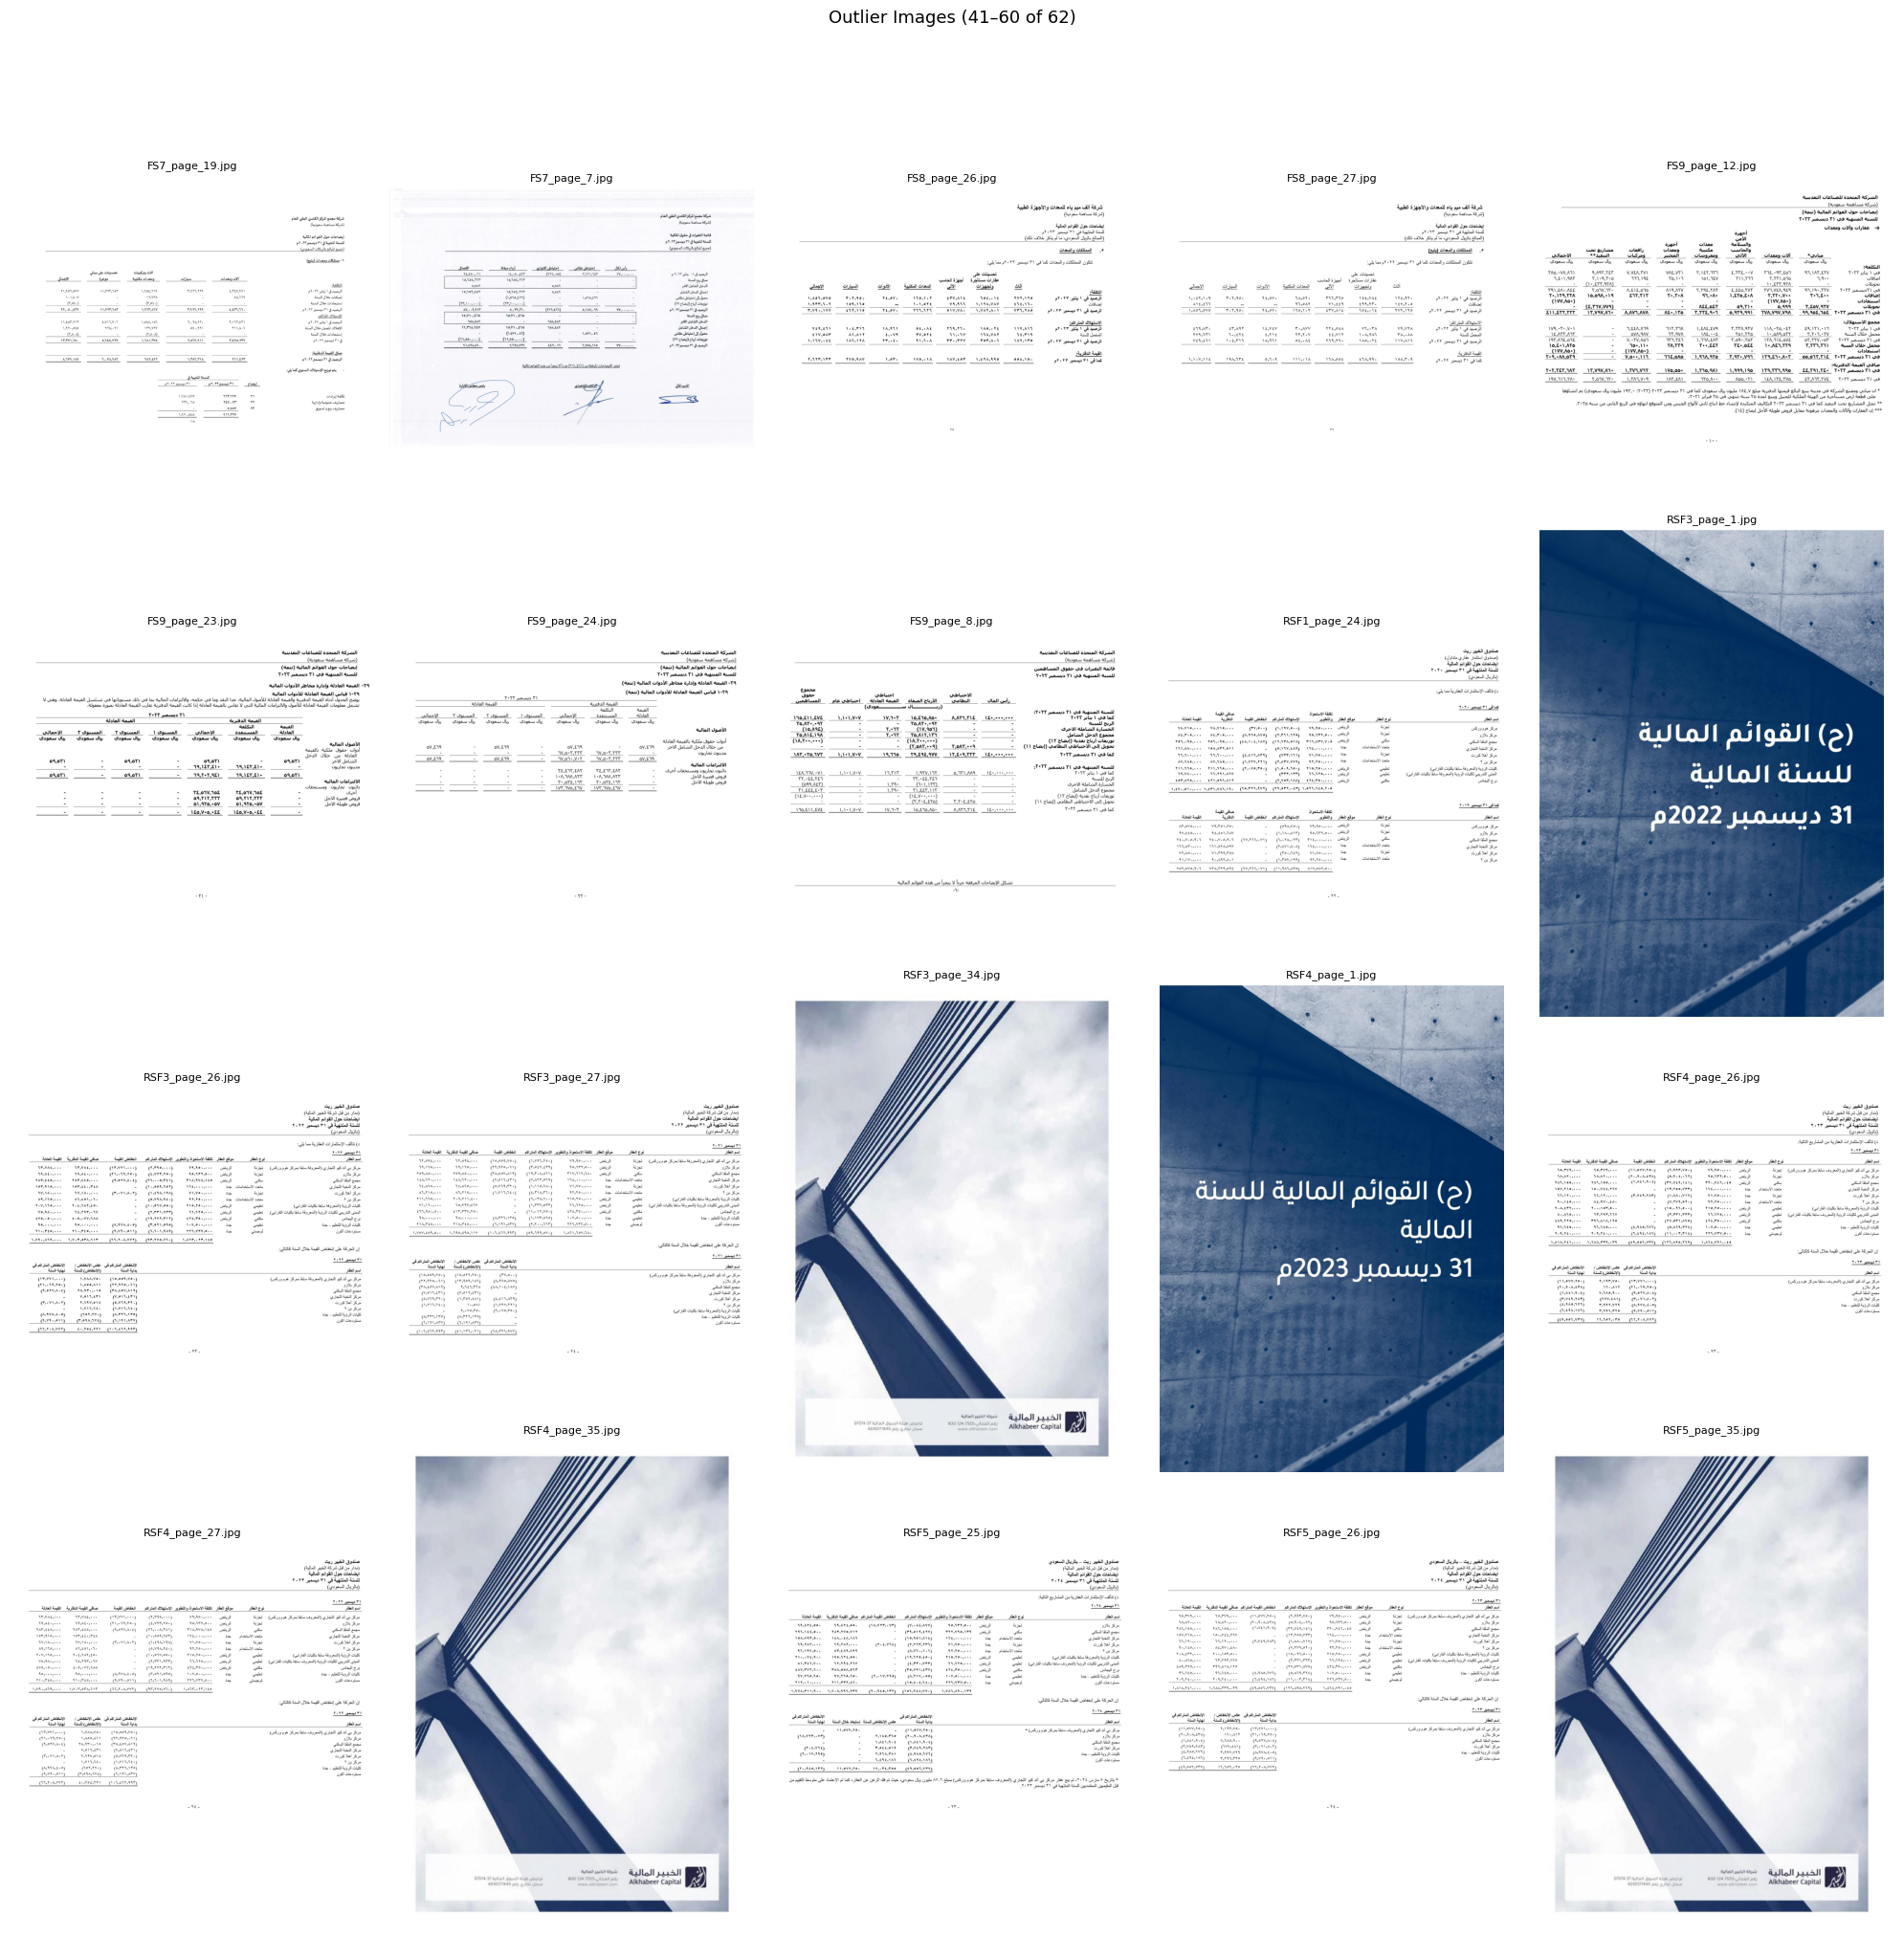

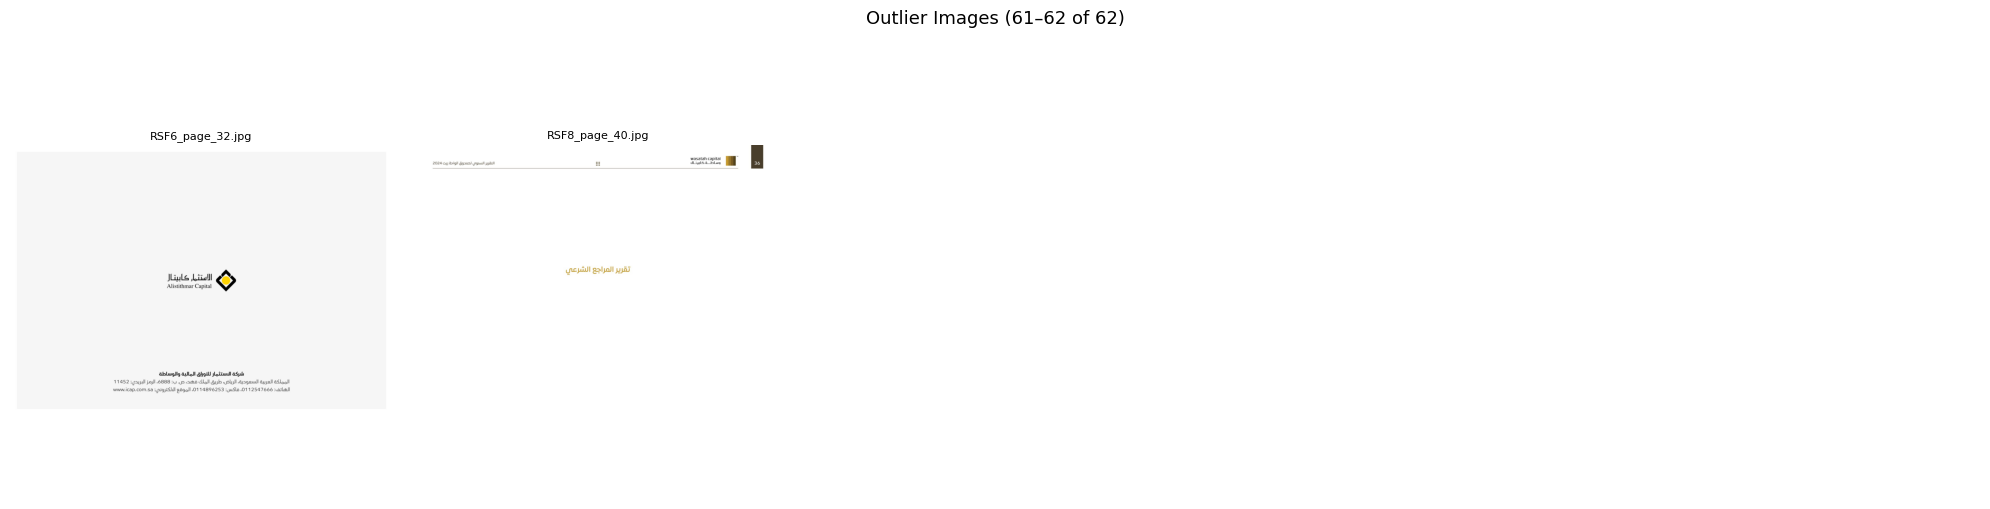

In [11]:
outlier_files = df[df["is_outlier"]]["file"].tolist()
cols = 5
rows_per_fig = 4
per_fig = cols * rows_per_fig

for fig_idx in range(0, len(outlier_files), per_fig):
    batch = outlier_files[fig_idx : fig_idx + per_fig]
    nrows = (len(batch) + cols - 1) // cols
    fig, axes = plt.subplots(nrows, cols, figsize=(20, 5 * nrows))
    axes = np.array(axes).flatten()

    for i, fname in enumerate(batch):
        img = Image.open(os.path.join(IMAGE_DIR, fname))
        axes[i].imshow(img)
        axes[i].set_title(fname, fontsize=8)
        axes[i].axis("off")

    for j in range(len(batch), len(axes)):
        axes[j].axis("off")

    start = fig_idx + 1
    end = fig_idx + len(batch)
    plt.suptitle(f"Outlier Images ({start}–{end} of {len(outlier_files)})", fontsize=13, y=1.01)
    plt.tight_layout()
    plt.show()